In [40]:
# Name: example_prob_model_plot.ipynb
# Authors: Stephan Meighen-Berger
# Plots the used prob model

In [41]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle
# from mpl_toolkits.mplot3d import Axes3D

In [42]:
# Adding path to module
sys.path.append("../")

In [43]:
# picture path
PICS = '../pics/'

In [44]:
# New approach
data = pickle.load( open("probability_model/offcenter_5cm_raw_v2.pkl", "rb" ) )
x_all = np.array(data[0])
y_all = np.array(data[1])
x_flash = np.array(data[2])
y_flash = np.array(data[3])
pos_det_y = 0.5 * 15. - 0.15

<ipython-input-44-2f661c5edc70>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_all = np.array(data[0])
<ipython-input-44-2f661c5edc70>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_all = np.array(data[1])
<ipython-input-44-2f661c5edc70>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_flash = np.array(data[2])
<ipython-in

In [45]:
# Cleaning
# Flattening and touching up
# Need to check why this needs to run twice
for i in range(2):
    x_all = np.array([np.array([elem]).flatten() for elem in x_all])
    y_all = np.array([np.array([elem]).flatten() for elem in y_all])
    x_flash = np.array([np.array([elem]).flatten() for elem in x_flash])
    y_flash = np.array([np.array([elem]).flatten() for elem in y_flash])
    x_all = np.concatenate(x_all).ravel()
    y_all = np.concatenate(y_all).ravel()
    x_flash = np.concatenate(x_flash).ravel()
    y_flash = np.concatenate(y_flash).ravel()

<ipython-input-45-3f67695739dc>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_all = np.array([np.array([elem]).flatten() for elem in x_all])
<ipython-input-45-3f67695739dc>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_all = np.array([np.array([elem]).flatten() for elem in y_all])
<ipython-input-45-3f67695739dc>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtyp

In [46]:
# The bins
xedges = np.linspace(0., 30., 301)
yedges = np.linspace(0., 15., 151)

In [47]:
# Binning all
H_all, xedges, yedges = np.histogram2d(x_all, y_all, bins=(xedges, yedges))

In [48]:
# Binning the flashes
H_flash, xedges, yedges = np.histogram2d(x_flash, y_flash, bins=(xedges, yedges))

In [49]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=False)

In [50]:
# Plotting standards
std_size = 10.
fontsize = 20.
lw=1.
h_length=1.
export_dpi=500

<ipython-input-51-897822132fce>:9: RuntimeWarning: invalid value encountered in true_divide
  ax1.pcolormesh(X, Y, np.nan_to_num(H_flash.T / H_all.T), vmax=0.05)


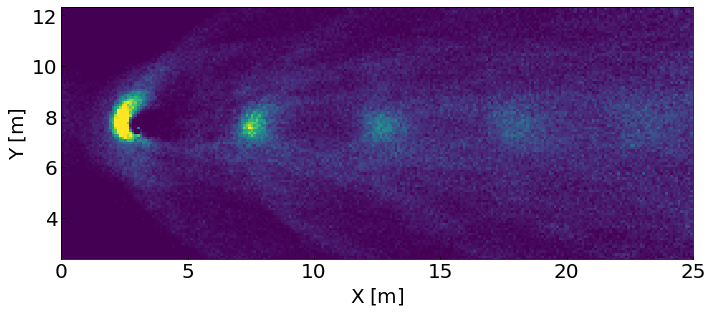

In [51]:
# Plotting
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
# -------------------------------------------------------------------------------------
# Plot mesh
X, Y = np.meshgrid(xedges, yedges)
# X, Y = np.meshgrid((xedges[1:] + xedges[:-1])/2., (yedges[1:] + yedges[:-1])/2.)
# -------------------------------------------------------------------------------------
# Plot
ax1.pcolormesh(X, Y, np.nan_to_num(H_flash.T / H_all.T), vmax=0.05)
# ax1.pcolormesh(X, Y, np.nan_to_num(H_all.T)
ax1.set_aspect('equal')
# -------------------------------------------------------------------------------------
# Axis
ax1.set_xlabel(r"$\mathrm{X\;[m]}$", fontsize=fontsize)
ax1.set_ylabel(r"$\mathrm{Y\;[m]}$", fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.set_xlim(0., 25.)
ax1.set_ylim(pos_det_y - 5., pos_det_y + 5.)
figure.tight_layout()
# -------------------------------------------------------------------------------------
# Storing
# figure.savefig(PICS + "Organism_Flashes_5cm_v2.png",
#                 bbox_inches='tight', dpi=export_dpi)

In [52]:
# pickle.dump([xedges, yedges, np.nan_to_num(H_flash.T / H_all.T)], open('probability_model//prob_model_10cm' + ".pkl", "wb"))

<ipython-input-52-6f21bb2a706d>:1: RuntimeWarning: invalid value encountered in true_divide
  pickle.dump([xedges, yedges, np.nan_to_num(H_flash.T / H_all.T)], open('probability_model//prob_model_10cm' + ".pkl", "wb"))
